# Inaugural Project

Imports and set magics:

In [9]:
# a. we import the required packeges 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# b. autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# c. we import your own code
import inauguralproject
import HouseholdSpecializationModel as HSM

## Question 1

We use the class to find how $\frac{H_F}{H_M}$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma =$ {0.5, 1.0, 1.5}

In [10]:
# a. we define the model 
model = HSM.HouseholdSpecializationModelClass()

# b. we define alpha and sigma 
alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]

# c. we create a dataframe where the alphas are the columns and sigmas are the indexes/rows 
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)

# d. for every alpha we loop over every sigma and use the 'solve_discrete' to extract HF and HM
for i in alpha_vector:
    for j in sigma_vector:
        # i. we add alpha_i to model 
        model.par.alpha = i
        # ii. we add sigma_j to model 
        model.par.sigma = j
        # iii. we solve the model 
        results = model.solve_discrete()
        # iv. we find the ratio 
        ratio = results.HF/results.HM
        # v. we add the ratio to the dataframe 
        df.loc[j,i] = ratio.round(4)

# e. we adjust and print the dataframe 
columns = pd.MultiIndex.from_tuples([('alpha', alpha_vector[0]), (' ', alpha_vector[1]), ('', alpha_vector[2])])
df.columns = columns
rows = pd.MultiIndex.from_tuples([('sigma', sigma_vector[0]), (' ', sigma_vector[1]), ('', sigma_vector[2])])
df.index = rows
print(f'HF over HM changes for varying alpha and sigma')
df

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-

HF over HM changes for varying alpha and sigma


,,alpha,,
,,0.25,0.50,0.75
sigma,0.5,0.5455,1.0,1.8333
,1.0,0.3077,1.0,3.25
,1.5,0.2143,1.0,4.6667


From the above table it is seen that, as women's productivity in home production relative to men's increases, as $\alpha$ increases, then women's hours working at home relative to men's increases. 

Further, as the elasticity increases then the hours worked at home become more elastic hence substitution increases. So, when women are less productive than men, $\alpha = 0.25$, then the $\frac{H_F}{H_M}$ decreases. The oppisite is the case when women are more productive. When they are equally productive, the elasticity has no effect. 

## Question 2

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. 

In [11]:
# a. we initialize alpha and sigma 
model.par.alpha = 0.5
model.par.sigma = 1

# b. empty lists to contain the log H and w 
logratioH = []
logratiow = []

# c. we loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. we set the wF = i
    model.par.wF = i
    # ii. we use 'solve_discrete' from the class to find the results and store en 'results'
    results = model.solve_discrete()
    # iii. append the log(HF/HM) til the list 'logratioH' 
    logratioH.append(np.log(results.HF/results.HM))
    # iv. append the log(wF/wM) til the list 'logratiow' 
    logratiow.append(np.log(i/model.par.wM))

# d. we construct a dataframe to contain H and w log ratios for every wF
plot_df = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioH, 4), "w ratio": np.round(logratiow, 4)})
plot_df

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


,wf,H ratio,w ratio
0,0.8,0.2231,-0.2231
1,0.9,0.0000,-0.1054
2,1.0,0.0000,0.0000
3,1.1,-0.1178,0.0953
4,1.2,-0.2231,0.1823


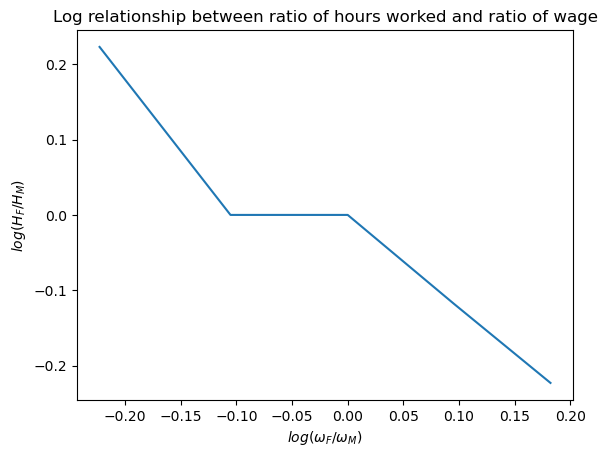

In [63]:
# e. we illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_df)

From the above figure we see that as women's wages increases relative to men, then women's share of hours working at home decreases. But when wages of women are 0.9 and 1.0, then the relative hours worked at home are the same. 

## Question 3

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$ again, but this time the choise set is continuous, so $L_M, L_F, H_M, H_F \in [0,24]$. 

In [12]:
# a. we construct empty lists to contain the log(HF/HM) and log(wF/wM) 
logratioHc=[]
logratiowc=[]

# b. we loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. we set the wF = i
    model.par.wF = i
    # ii. we use 'solve' from the class to find the results and store en 'resultsc'
    resultsc =model.solve()
    # iii. append the log(HF/HM) til the list 'logratioHc' 
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    # iv. append the log(wF/wM) til the list 'logratiowc' 
    logratiowc.append(np.log(i/model.par.wM))

# c. we construct a dataframe to contain H and w log ratios for every wF
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioHc, 4), "w ratio": np.round(logratiowc, 4)})
plot_dfc

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


,wf,H ratio,w ratio
0,0.8,0.2231,-0.2231
1,0.9,0.1053,-0.1054
2,1.0,-0.0000,0.0000
3,1.1,-0.0953,0.0953
4,1.2,-0.1823,0.1823


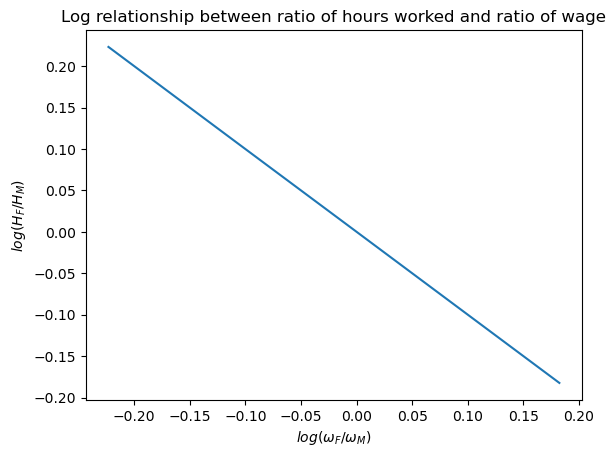

In [13]:
# d. we illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_dfc)

From the above figure we see that ... 

## Question 4

We choose $\alpha$ and $\sigma$ such that it minimizes $(\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$. To illustrate, we plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. By default, we use the continuous values for $L_M, L_F, H_M$ and $H_F$.

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:70: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSp

Text(0, 0.5, '$log(H_F/H_M)$')

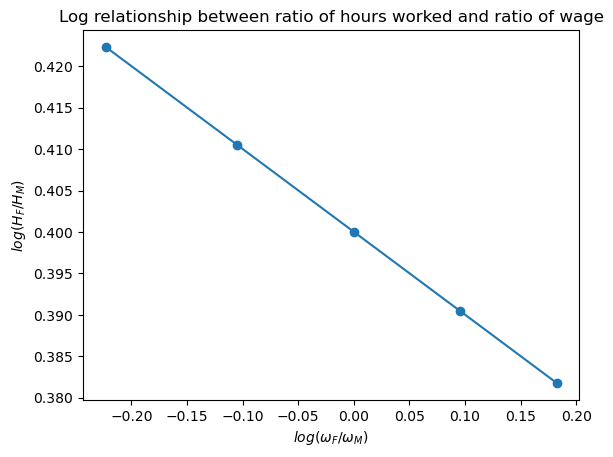

In [14]:
# a. we use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# b. we find the log H ratio 
log_H_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# c. we construct a figure to illustrate the relationship between log H ratio and log w ratio 
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
# d. we add the 'log_H_ratio' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),log_H_ratio)
# e. we add the regression from the model 
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))
# f. we set title and axis labels 
ax.set_title('Log relationship between ratio of hours worked and ratio of wage')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')

From the above figure it is seen that ...

## Question 5

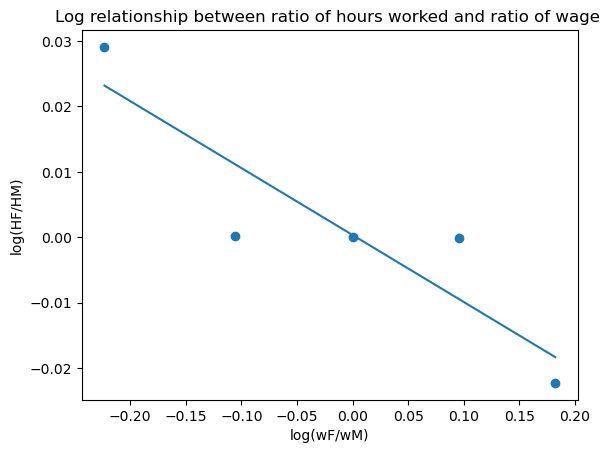

In [91]:
model.estimate(alpha=0.5)

rationy = np.log(model.sol.HF_vec/model.sol.HM_vec)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.scatter(np.log(model.par.wF_vec),rationy)
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');